**CSI 4142 Data Science** <br/>
*Assignment 1: Dataset Insights*

# Identification

Name: Eli Wynn<br/>
Student Number: 300248135

Name: Jack Snelgrove<br/>
Student Number: 300247435


Our datasets have been uploaded from the public repository:

- [github.com/eli-wynn/Datasets](https://github.com/eli-wynn/Datasets)

# Introduction

The goal of this report is to perform data analysis on a heart attack database and student placement dataset. The audience would be the general public wanting to learn about factors that could lead to a heart attack and students/educators wanting to examine student results after graduation respectively.

Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importing Datasets

In [2]:
heart  = "https://raw.githubusercontent.com/eli-wynn/Datasets/refs/heads/main/heart.csv"
placement = "https://raw.githubusercontent.com/eli-wynn/Datasets/refs/heads/main/placementdata.csv"
heartData = pd.read_csv(heart)
placementData = pd.read_csv(placement)
placementDataML = placementData.copy()

# Dataset Descriptions
## [Placement Data](https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data)
Author: RK <br>
Purpose: This dataset contains information about the students academic and training and placement status<br>
Shape: Columns: 12, Rows: 10000<br>
|Features|Type|Description|
|--------|----|-----------|
|Student ID|Numerical|Primary key to identify a student|
|CGPA|Numerical|Culmitive Grade Point Average of a student|
|Internships| Numerical| Number of internships a student has completed|
|Projects| Numerical| Number of project a student has completed|
|Workshops/Certifications| Numerical| Number of Certifications or Workshops that a student has completed|
|AptitudeTestScore| Numerical| Score on a test that rates a students ability in the workforce|
|SoftSkillsRating|Numerical|A score to determine the level of a students soft skills|
|ExtracurricularActivities| Categorical| 'Yes' or 'No'based on whether a student has participated in extracurricular activities|
|PlacementTraining| Categorical|'Yes' or 'No' based on whether a student has completed placement training|
|SSC_Marks|Numerical|Secondary School Cerificate grades|
|HSC_Marks|Numerical|Higher Secondary Cerificate grades|
|PlacementStatus|Categorical| 'Placed' or 'NotPlaced' based on whether a student received a placement or not|

## [Heart Data](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
Author: fedesoriano <br>
Purpose: This dataset contains regarding heart function in order to predict heart failure<br>
Shape: Columns: 12, Rows: 918<br>
| Features            | Type      | Description                                                                                       |
|-----------------|---------------|---------------------------------------------------------------------------------------------------|
| Age             | Numerical     | Age of the patient [years]                                                                         |
| Sex             | Categorical   | Sex of the patient [M: Male, F: Female]                                                            |
| ChestPainType   | Categorical   | Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]|
| RestingBP       | Numerical     | Resting blood pressure [mm Hg]                                                                     |
| Cholesterol     | Numerical     | Serum cholesterol [mm/dl]                                                                          |
| FastingBS       | Categorical   | Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]                                    |
| RestingECG      | Categorical   | Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy]|
| MaxHR           | Numerical     | Maximum heart rate achieved [Numeric value between 60 and 202]                                     |
| ExerciseAngina  | Categorical   | Exercise-induced angina [Y: Yes, N: No]                                                           |
| Oldpeak         | Numerical     | Oldpeak = ST [Numeric value measured in depression]                                                |
| ST_Slope        | Categorical   | The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]          |
| HeartDisease    | Categorical   | Presence of heart disease [1: Yes, 0: No]                                                         |


# Heart Failure Prediction Insights

All the proof of the insights is present in the code and subsequent table directly below the insight

1. The risk of heart problems increases dramatically after age 40 and drops off after 60. It is interesting that there is a drop off with age. Is that due to less older people being included in the data? or less older people surviving with a heart condition?

In [ ]:
plt.hist(heartData['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

2. Approximately 56% of individuals included in the data have heart disease

In [ ]:
#code for a countplot from case study in class
sns.countplot(x="HeartDisease", hue="HeartDisease", data=heartData)
plt.title("Individuals With Heart Disease")
plt.xlabel("Heart Disease (0 = Healthy, 1 = Diseased)")
plt.ylabel("Count")
plt.show()

3. Approximately 20% of people have ATA chest pain, 23% have NAP chest pain, 5% have TA chest pain and 52% have ASY chest pain
- TA -> Typical Angina
- ASY -> Asymptomatic
- ATA -> Atypical Angina
- NAP -> Non-Anginal Pain

In [ ]:
#code for a countplot from case study in class
sns.countplot(x="ChestPainType", hue="ChestPainType", data=heartData)
plt.title("Individuals Sorted By Chest Pain Type")
plt.xlabel("Chest Pain Type (0 = Healthy, 1 = Diseased)")
plt.ylabel("Count")
plt.show()

4. Approximately 34% of participants had low risk cholestoral, ~27% had medium risk, ~28% had high risk and ~11% had extreme risk

The categories were made based upon information from this website: https://medlineplus.gov/cholesterollevelswhatyouneedtoknow.html. The kaggle dataset explains that the cholestorol levels, are the total (serum) cholestorol levels and says it is measured in mm/dl. I made the assumption that mm/dl is a typo and the correct reading is in mg/dl since that is the standard measurement and the only alternative I found is mmol/l.

In [ ]:
#function numbers for risk levels are sourced from the link above 
def categorize_cholesterol(chol):
    if chol < 200:
        return "Low Risk"
    elif 200 <= chol < 240:
        return "Medium Risk"
    elif 240 <= chol < 300:
        return "High Risk"
    else:
        return "Extreme Risk"

heartData["Cholesterol_Risk"] = heartData["Cholesterol"].apply(categorize_cholesterol)

sns.countplot(x="Cholesterol_Risk", data=heartData, order=["Low Risk", "Medium Risk", "High Risk", "Extreme Risk"])
plt.title("Cholesterol Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

5. There is a strong correlation between exercise induced angina and heart disease


In [ ]:
ax = sns.countplot(x="HeartDisease", data=heartData, hue="ExerciseAngina")
total = len(heartData)

for p in ax.patches:
    height = p.get_height()
    # Position the text below the bar
    ax.annotate(height, 
                (p.get_x() + p.get_width() / 2, 5),  # Position text below
                ha="center", va="center", fontsize=10, color="black")

plt.title("Exercise Angina vs Heart Disease")
plt.xlabel("Heart Disease (0 = N, 1 = Y)")
plt.ylabel("Count")
plt.show()

510 people don't have heart disease (355/510)*100 ~= 70% of people without heart disease don't have exercise induced angina
508 people do have heart disease (316/508)*100 ~= 62% of people with heart disease also have exercise induced angina

6. approximately 61% of people with extreme or low cholestorol are asymptomatic in terms of chest pain. People with medium or high cholestorol levels are more likely to experience chest pain at approximately 48.5%


In [ ]:
sns.countplot(x="Cholesterol_Risk", data=heartData, order=["Low Risk", "Medium Risk", "High Risk", "Extreme Risk"], hue="ChestPainType")
plt.title("Cholesterol Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

percentage_data = (
    heartData.groupby("Cholesterol_Risk")["ChestPainType"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)

print("Cholestorol Risk: ")
print(percentage_data)

7. There is a small correlation between Age and increased cholestorol

In [ ]:
tempData = heartData[heartData['Cholesterol']!=0]
sns.scatterplot(x="Age", y="Cholesterol", data=tempData)

# need to remove 0 cholestorol values - impossible to have zero cholestorol it must not have been measured
plt.title("Correlation Between Age and Cholesterol Levels")
plt.xlabel("Age")
plt.ylabel("Cholesterol Levels")
plt.show()

Looking at the above plot there is a slight trend of increased cholestorol as age increases but it is not significant and there are many outliers. 

8. There is no correlation between RestingBP and MaxHR

In [ ]:
sns.scatterplot(x="RestingBP", y="MaxHR", data=heartData)

plt.title("Correlation Between Resting Blood Pressure and Max Heart Rate")
plt.xlabel("RestingBP")
plt.ylabel("MaxHR")
plt.show()

9. Having High or Extremely High cholestorol levels makes you more at risk of heart disease. Interestingly the large majority of people with low risk cholestorol have heart disease. 

The high heart disease with low risk could be explained by cholestorol removing surgeries like or a lot of the high cholestorol people with heart disease passing away and as such not being present in the data

In [ ]:
sns.countplot(x="Cholesterol_Risk", data=heartData, order=["Low Risk", "Medium Risk", "High Risk", "Extreme Risk"], hue="HeartDisease")
plt.title("Cholesterol Risk vs Heart Disease")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

percentage_data = (
    heartData.groupby("Cholesterol_Risk")["HeartDisease"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)

print("Cholestorol Risk: ")
print(percentage_data)

10. The various distributions highlight how numerous factors can be associated with heart disease and not one thing is entirely responsible or indicative of heart disease

In [ ]:
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="HeartDisease", y=col, data=heartData)
    plt.title(f"Distribution of {col} by Heart Disease")
    plt.xlabel("Heart Disease")
    plt.ylabel(col)
    plt.show()

## Placement Insight

1. How many student who were surveyed got Placed vs Not placed?

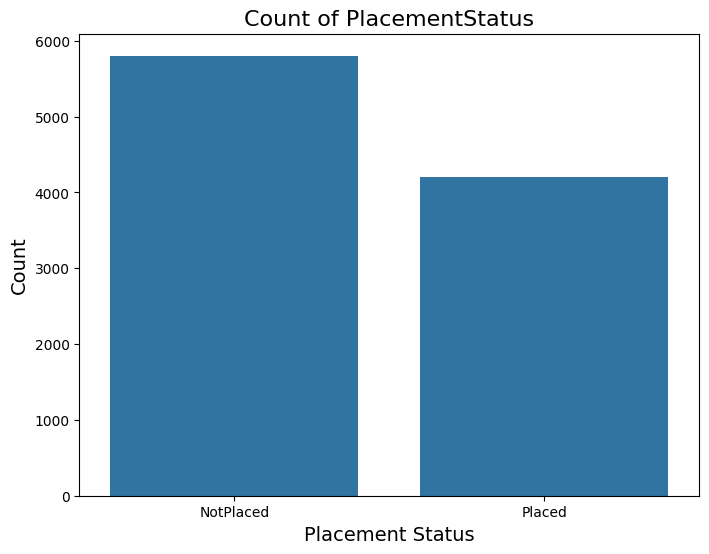

In [10]:
#Univariate: Categorical - r2

#Define the figure size
plt.figure(figsize=(8, 6))

#Taken from lecture slides
sns.countplot(x='PlacementStatus', data= placementData)

# Add labels and title
plt.title('Count of PlacementStatus', fontsize=16)
plt.xlabel('Placement Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()


Insight #1: Based on the chart above, ~58% of the students were placed in internships <br><br>
2. Did the number of completed internships effect the number of students who got placed? 

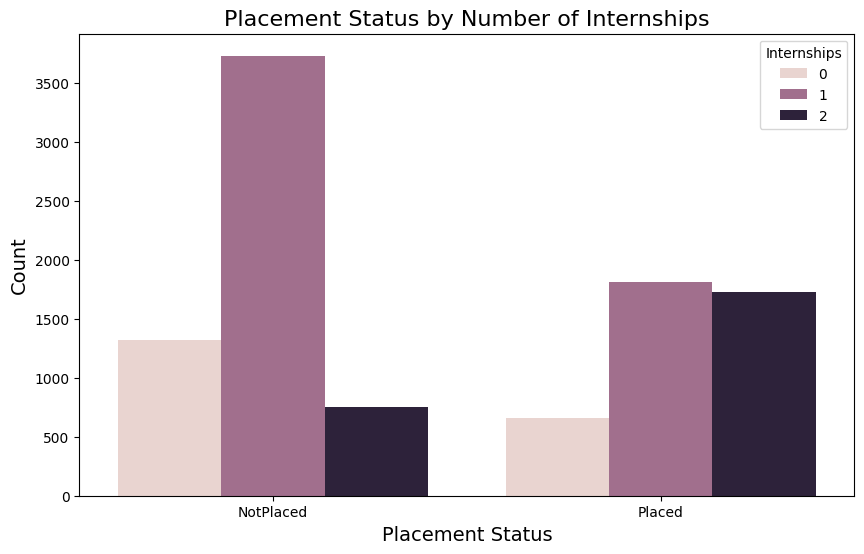

In [ ]:
# Bivarite: Categorical / Numerical 

#Define figure size 
plt.figure(figsize=(10, 6))

#Derived from code provided in lecture slides
sns.countplot(x='PlacementStatus', hue = 'Internships',data=placementData)

# Adding labels and title
plt.title('Placement Status by Number of Internships', fontsize=16)
plt.xlabel('Placement Status', fontsize=14)
plt.ylabel('Count', fontsize=14)


# Display the plot
plt.show()

Insight #2: Based on the graph above, the majority of students who had 2 internships completed were able to get Placed. For Students who have only completed one or no internships had a higher chance of not placing than being placed. 

3. Did students who got placed have better CGPAs than those who didnt?


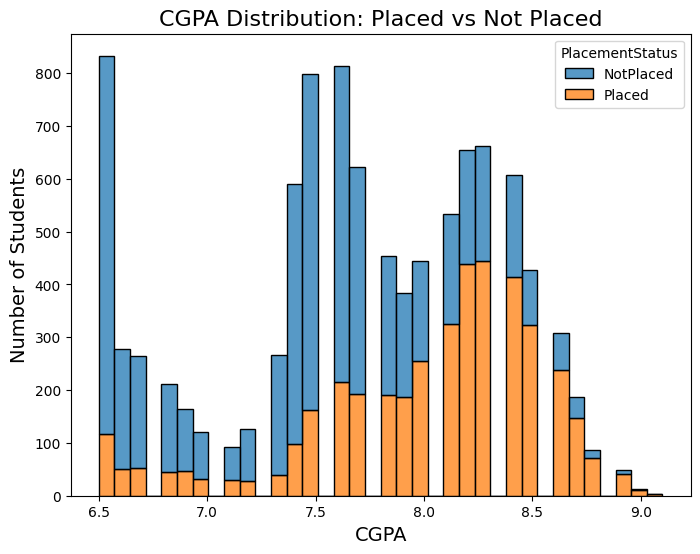

In [18]:
#Bivariate: Numerical / Categorical - r7

# Define figure size
plt.figure(figsize=(8, 6))

# Plot stacked histogram 
sns.histplot(data= placementData, x='CGPA',hue='PlacementStatus', multiple='stack')

# Labels and title
plt.title('CGPA Distribution: Placed vs Not Placed', fontsize=16)
plt.xlabel('CGPA', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Show plot
plt.show()

Insight #3: It shows in the graph above that in the majority of cases students who got placed typically had higher CGPAs that those who did not. However, the graph also shows that some students who had a high CGPAs did not place and some students with low CGPAs were able to find placements. 

1. How are the student soft skills

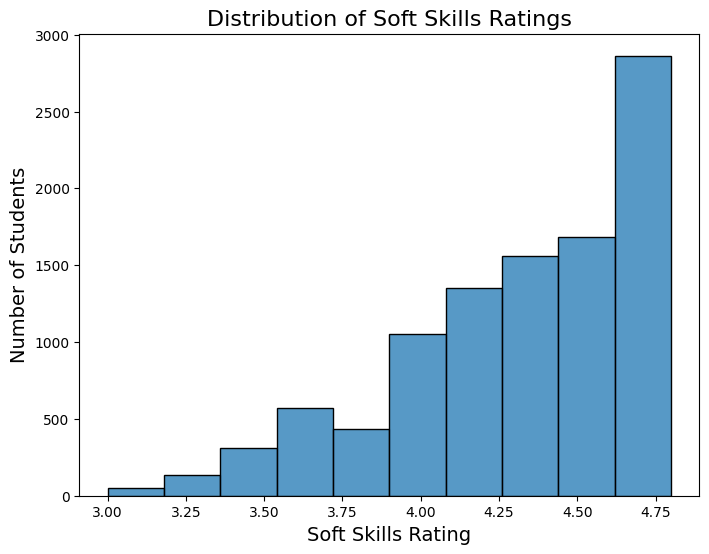

In [21]:
# Univariate: Numerical - r1

# Define figure size
plt.figure(figsize=(8, 6))

# Plot histogram for Soft Skills Rating 
sns.histplot(x='SoftSkillsRating', data = placementData, bins=10) #derived from lecture slides

# Labels and title
plt.title('Distribution of Soft Skills Ratings', fontsize=16)
plt.xlabel('Soft Skills Rating', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Show plot
plt.show()


Insight #4: The graph above is left skewed showing us that most of the students have high soft skills rating. 

5. How well did students do on their Aptitude tests?

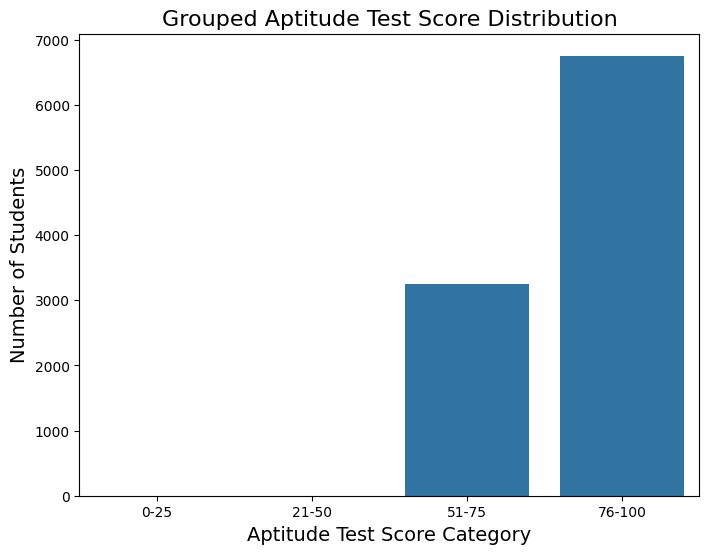

In [ ]:
# Univariate: Grouped numerical  

#Generated using ChatGPT - 
#Prompt:  I have a column with test scores 0-100. I want to create 4 bins: 0-25, 26-50, 51-75, 76-100 and fill them with the test scores. I then want to make a countplot for these bins
bins = [0, 25 , 50, 75, 100]  # Define bin edges
labels = ['0-25', '21-50', '51-75', '76-100']  # Define labels for bins
placementData['AptitudeTestScoreBins'] = pd.cut(placementData['AptitudeTestScore'], bins=bins, labels=labels, include_lowest=True)


# Define figure size
plt.figure(figsize=(8, 6))

sns.countplot(data = placementData, x='AptitudeTestScoreBins')


# Add labels and title
plt.title('Grouped Aptitude Test Score Distribution', fontsize=16)
plt.xlabel('Aptitude Test Score Category', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Show plot
plt.show()

Insight #5: Based on the graph above, we can see that all students passed their Aptitude test with the majority of students scoring above a 75%. We grouped scores in increments of 25% so that we can see a more simplified overview of the grades. I chose these intervals so we could see whether students got >50% (passed). 

6. Does a student having placement training have an effect on a student getting placed?

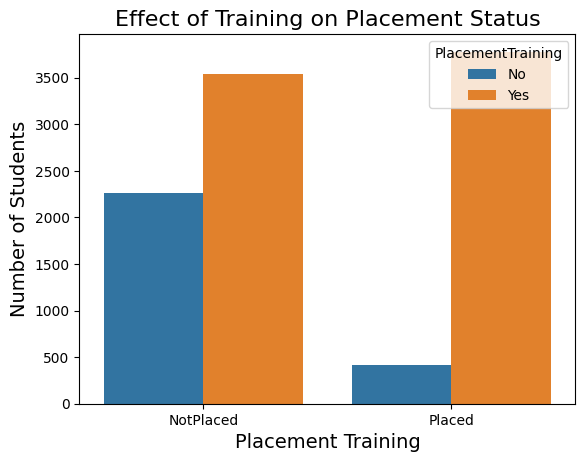

In [ ]:
# Bivariate: Categorical / Categorical - r4

#Derived from lecture slides
sns.countplot(data=placementData, x= 'PlacementStatus', hue='PlacementTraining')

# Labels and title
plt.title('Effect of Training on Placement Status', fontsize=16)
plt.xlabel('Placement Training', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Show plot
plt.show()

Insight #6: Based on the graph above, there are very few students who got placed without being trained. However, there is a significant amount of students that got trained but still did not get placed. 

7. Is there a correlation between a students SSC marks and their HSC marks? 

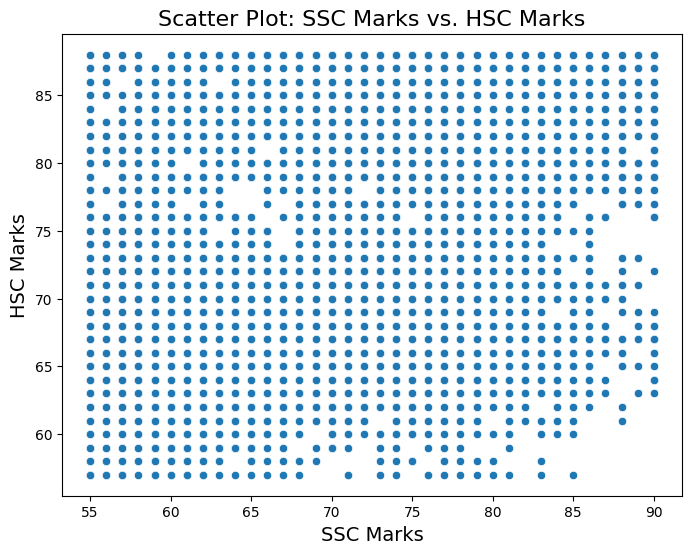

In [26]:
# Bivariate: Numerical / Numerical - r6 

# Define figure size
plt.figure(figsize=(8, 6))

# Create scatter plot
sns.scatterplot(data=placementData, x='SSC_Marks', y='HSC_Marks')

# Add labels and title
plt.title('Scatter Plot: SSC Marks vs. HSC Marks', fontsize=16)
plt.xlabel('SSC Marks', fontsize=14)
plt.ylabel('HSC Marks', fontsize=14)

# Show plot
plt.show()

Insight #7: Based on the scatter-plot above, there does not seem to be a correlation between a students HSC Marks and their SSC Marks 

8. Did the number of completed projects effect students placement status?

In [ ]:
# Bivarite: Categorical / Numerical 

# Grouping data by PlacementStatus and Internships
status_internship_counts = placementData.groupby(['PlacementStatus', 'Projects']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
status_internship_counts.plot(kind='bar', width=0.7, edgecolor='black', colormap='coolwarm', figsize=(10, 6))

# Adding labels and title
plt.title('Placement Status by Number of Projects', fontsize=16)
plt.xlabel('Placement Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Projects')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

Insight #8: Based on the graph above, the majority of students who had done one or two projects did not get placed. Students who completed 3 projects were likely to get placed. Very few students had completed 0 projects. 

9. Would I be placed? 

In [ ]:

# ML specific imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Convert boolean categorical data to binary
placementDataML['PlacementStatus'] = LabelEncoder().fit_transform(placementData['PlacementStatus'])
placementDataML['ExtracurricularActivities'] = LabelEncoder().fit_transform(placementData['ExtracurricularActivities'])
placementDataML['PlacementTraining'] = LabelEncoder().fit_transform(placementData['PlacementTraining'])


# Define Features and Target of the dataset 
X = placementDataML.drop(columns=['PlacementStatus'])  # Features
y = placementDataML['PlacementStatus']  # Target 


# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Convert the input sample to a NumPy array and reshape it correctly
Pred_self = np.array([10001, 7.2, 3, 2, 0, 80, 4.5, 0, 1, 100, 100], dtype=float).reshape(1, -1)

# Apply the same scaling as training data
Pred_self_scaled = scaler.transform(Pred_self)

# Make a prediction
y_pred = model.predict(Pred_self_scaled)

# Output the prediction
print("Predicted Placement Status:", "Placed" if y_pred[0] == 1 else "Not Placed")



#Insight #9: Based on the data above, the machine learning moodel has an acuaracy rating of ~0.8. After adding a new row of data which represents myself, the machine learning model predicts (with 80% acuracy) that I would be placed. 

1.  Do students who participate in extra curricular activities have more workshops/certifications completed?

In [ ]:
# Define Figure size
plt.figure(figsize=(8, 6))

#Generate boxplot 
sns.boxplot(x='ExtracurricularActivities', y='Workshops/Certifications', data = placementData)

#Add lables
plt.title('Workshops/Certifications by Extracurricular Activities', fontsize=16)
plt.xlabel('Extracurricular Activities', fontsize=14)
plt.ylabel('Workshops/Certifications', fontsize=14)

#display plot
plt.show()


Insight #10: Based on the graph above, we can see that on average, students with extracurricular activities tend to hace more workshops and certifications. 

# Conclusion

In conclusion we learned about both heart disease and placement through all of these data insights
